# <center> Classification de base : classer les images de vêtements </center>

**Source :** https://www.tensorflow.org/tutorials/keras/classification?hl=fr

Ce guide forme un modèle de réseau neuronal pour classer les images de vêtements, comme les baskets et les chemises.

## Importations 

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.11.0


## Jeu de données

Ce guide utilise le jeu de données Fashion MNIST qui contient 70 000 images en niveaux de gris dans 10 catégories. Les images montrent des vêtements individuels à basse résolution (28 par 28 pixels).

Ce guide utilise Fashion MNIST pour la variété et parce que c'est un problème légèrement plus difficile que le MNIST ordinaire. Les deux ensembles de données sont relativement petits et sont utilisés pour vérifier qu'un algorithme fonctionne comme prévu. Ce sont de bons points de départ pour tester et déboguer le code.

Ici, 60 000 images sont utilisées pour former le réseau et 10 000 images pour évaluer la précision avec laquelle le réseau a appris à classer les images. 

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# stocker le nom des classes (10, de 0 à 9)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Exploration des données
L'exemple suivant montre qu'il y a 60 000 images dans l'ensemble d'apprentissage, chaque image étant représentée en 28 x 28 pixels :

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
# Nombre de labels
len(train_labels)

60000

In [7]:
# jeu de test
print(test_images.shape)

# Nombre de labels
(len(test_labels))

(10000, 28, 28)


10000

## Prétraitrement des données 

Les données doivent être prétraitées avant de former le réseau. Si vous inspectez la première image de l'ensemble d'apprentissage, vous verrez que les valeurs de pixel se situent dans la plage de 0 à 255 :

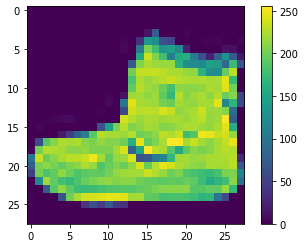

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Normaliser les données : 

Obtenir des valeurs entre 0 et 1 : on divise chaque valeur par 255.

In [9]:
train_images = train_images / 255.0

test_images = test_images / 255.0

## Visualisation des données :

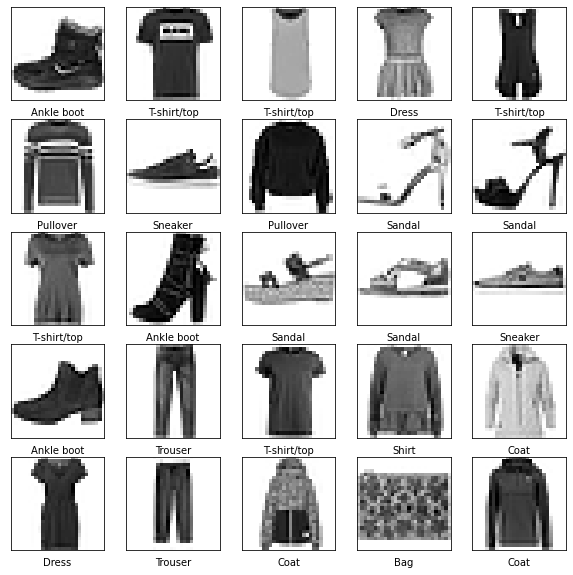

In [10]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    
plt.show()

## Construction du modèle

In [12]:
# empilement des couches
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

La première couche de ce réseau, `tf.keras.layers.Flatten` , transforme le format des images d'un tableau bidimensionnel (de 28 par 28 pixels) en un tableau unidimensionnel (de 28 * 28 = 784 pixels). Considérez ce calque comme désempilant des rangées de pixels dans l'image et en les alignant. Cette couche n'a aucun paramètre à apprendre ; il ne fait que reformater les données.

Une fois les pixels aplatis, le réseau se compose d'une séquence de deux couches `tf.keras.layers.Dense` . Ce sont des couches neuronales densément connectées ou entièrement connectées. La première couche Dense compte 128 nœuds (ou neurones). La deuxième (et dernière) couche renvoie un tableau logits d'une longueur de 10. Chaque nœud contient un score indiquant que l'image actuelle appartient à l'une des 10 classes.



## Compilation du modèle

Avant que le modèle ne soit prêt pour l'entraînement, il a besoin de quelques réglages supplémentaires. Ceux-ci sont ajoutés lors de l'étape de compilation du modèle :

- **Fonction de perte** : mesure la précision du modèle pendant l'entraînement. Vous souhaitez minimiser cette fonction pour "orienter" le modèle dans la bonne direction.
- **Optimiseur** : c'est ainsi que le modèle est mis à jour en fonction des données qu'il voit et de sa fonction de perte.
- **Métriques** : utilisées pour surveiller les étapes de formation et de test. L'exemple suivant utilise precision , la fraction des images qui sont correctement classées.

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Entraînement du modèle

L'entraînement du modèle de réseau neuronal nécessite les étapes suivantes :

- Transférez les données de formation au modèle. Dans cet exemple, les données d'apprentissage se trouvent dans les tableaux `train_images` et `train_labels`.
- Le modèle apprend à associer des images et des étiquettes.
- Vous demandez au modèle de faire des prédictions sur un jeu de test — dans cet exemple, le tableau `test_images`.
- Vérifiez que les prédictions correspondent aux étiquettes du tableau `test_labels`.

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.4948 - accuracy: 0.8268
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3757 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3369 - accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3140 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2957 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2815 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2698 - accuracy: 0.9012
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2585 - accuracy: 0.9036
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2497 - accuracy: 0.9067
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2

## Evaluation de la précision

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3506 - accuracy: 0.8736 - 762ms/epoch - 2ms/step

Test accuracy: 0.8736000061035156


Il s'avère que la précision sur l'ensemble de données de test est un peu inférieure à la précision sur l'ensemble de données d'apprentissage. Cet écart entre la précision de l'entraînement et la précision des tests représente un surapprentissage . Le surajustement se produit lorsqu'un modèle d'apprentissage automatique fonctionne moins bien sur de nouvelles entrées inédites que sur les données d'apprentissage. Un modèle surajusté "mémorise" le bruit et les détails dans l'ensemble de données d'apprentissage à un point tel qu'il a un impact négatif sur les performances du modèle sur les nouvelles données. 

## Faire des prédictions 

On utilise `softmax` pour transformer en probabilité.

In [16]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [18]:
# voir toutes les prédictions pour un objet
predictions[0]

array([8.7827509e-08, 2.1981661e-08, 1.9206648e-07, 1.1124419e-05,
       1.4779000e-08, 1.7042385e-04, 3.7806845e-07, 6.9261123e-03,
       3.0947643e-07, 9.9289125e-01], dtype=float32)

In [19]:
# récupérer la prédiction la plus forte
np.argmax(predictions[0])

9

In [20]:
# comparer avec le label
test_labels[0]

9

## Visualisation

In [22]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

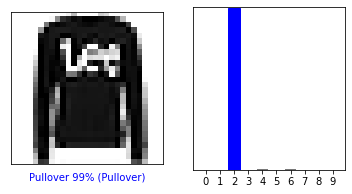

In [26]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

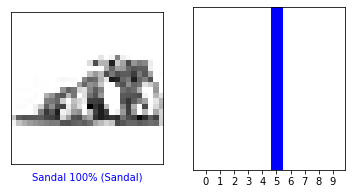

In [25]:
i = 11
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

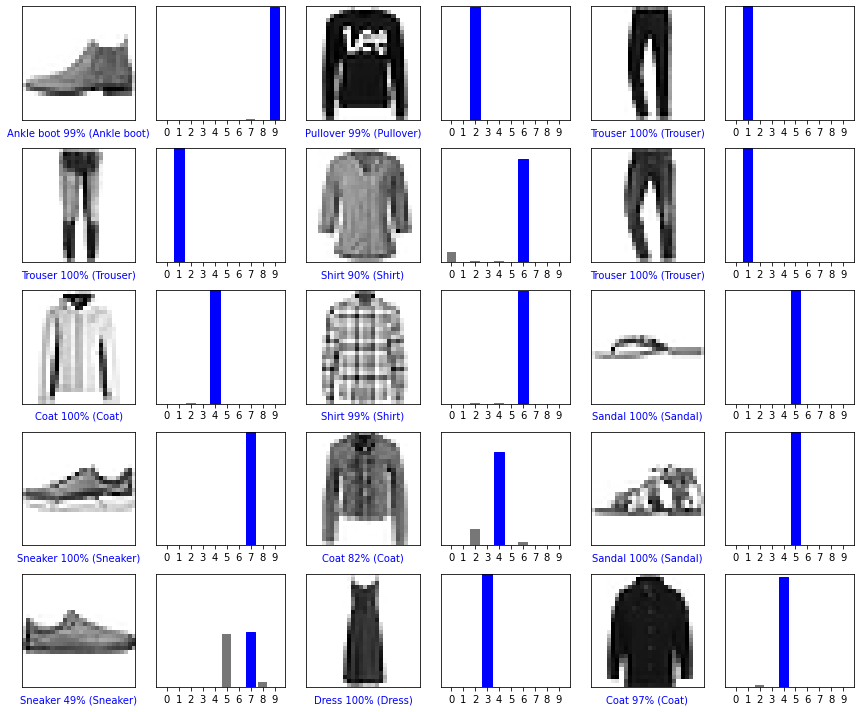

In [27]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Utiliser le modèle entraîné sur une seule image 

In [28]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [29]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [30]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 31ms/step
[[2.7070750e-05 7.6365277e-12 9.9488777e-01 2.4609485e-11 2.5765549e-03
  1.1547123e-09 2.5085059e-03 2.4692739e-16 8.3874220e-08 5.5205694e-14]]


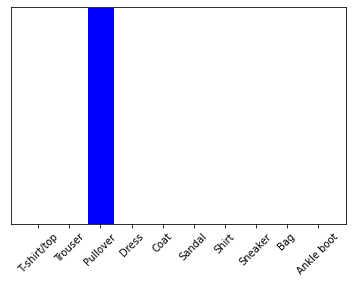

In [31]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [32]:
np.argmax(predictions_single[0])

2